In [146]:
# Student Names
# Muscaan Balli - 23205368
# Rohit Sharma - 23200487
# Olumayokun Fadelu - 23201323
# Muhammad Usama Bhatti - 23202792
   
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, max_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Forcasting Demand

In [68]:
#Reading Consumption Data
consumed = pd.read_csv('Demand.csv')
consumed.head()

,STATISTIC,Statistic Label,C02405V02899,Energy Supply and Consumption,TLIST(A1),Year,UNIT,VALUE
0,SEI05,Gross Energy Consumption,6,Primary energy supply including non energy,1990,1990,ktoe,10131
1,SEI05,Gross Energy Consumption,6,Primary energy supply including non energy,1991,1991,ktoe,10341
2,SEI05,Gross Energy Consumption,6,Primary energy supply including non energy,1992,1992,ktoe,10334
3,SEI05,Gross Energy Consumption,6,Primary energy supply including non energy,1993,1993,ktoe,10511
4,SEI05,Gross Energy Consumption,6,Primary energy supply including non energy,1994,1994,ktoe,10997


# PreProcessing

In [69]:
consumed = consumed[consumed['Energy Supply and Consumption']=='Final energy consumption']

In [88]:
consumed = consumed[['Year','VALUE']]
consumption = consumed
consumption['Year'] = pd.to_datetime(consumption.Year, format='%Y')

In [82]:
test = consumption.iloc[25:]
consumption = consumption.iloc[:25]

In [89]:
consumption.set_index('Year')

,VALUE
Year,
1990-01-01,7249
1991-01-01,7448
1992-01-01,7325
1993-01-01,7591
1994-01-01,7861
1995-01-01,7979
1996-01-01,8335
1997-01-01,8646
1998-01-01,9356


In [90]:
sns.set()

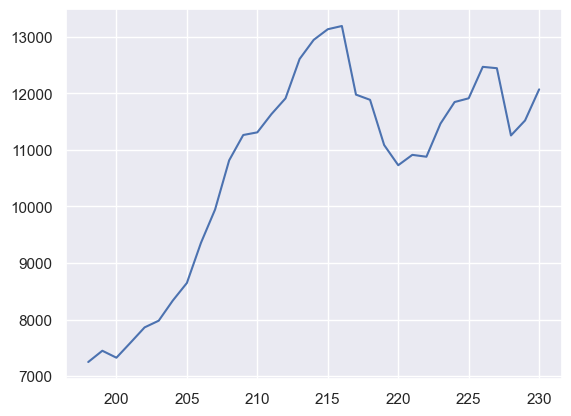

In [91]:
#Plot
plt.plot(consumption.index, consumption['VALUE'], )

In [87]:
consumption

,Year,VALUE
198,1990-01-01,7249
199,1991-01-01,7448
200,1992-01-01,7325
201,1993-01-01,7591
202,1994-01-01,7861
203,1995-01-01,7979
204,1996-01-01,8335
205,1997-01-01,8646
206,1998-01-01,9356
207,1999-01-01,9944


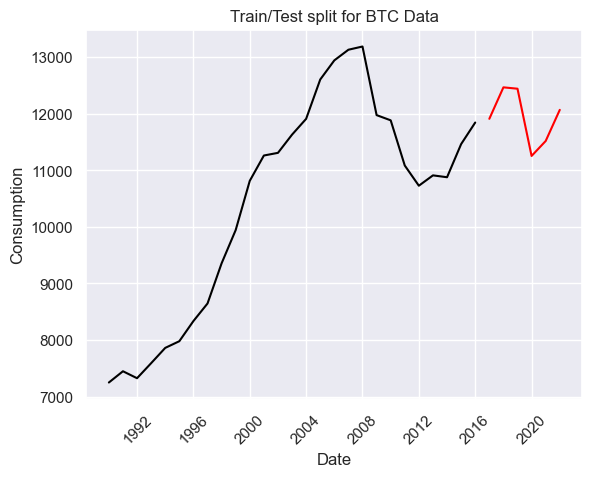

In [92]:
#Train Test Split
train = consumption[consumption.Year < pd.to_datetime("2016-12-01", format='%Y-%m-%d')]
test = consumption[consumption.Year > pd.to_datetime("2016-12-01", format='%Y-%m-%d')]
train =train.set_index('Year')
test = test.set_index('Year')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Consumption')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Data")
plt.show()

In [93]:
y = train['VALUE']

In [115]:
#Using SARIMAX for time series forecasting
ARMAmodel = SARIMAX(y, order = (5, 1, 0))

In [116]:
#Fitting the Model
ARMAmodel = ARMAmodel.fit()

In [117]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

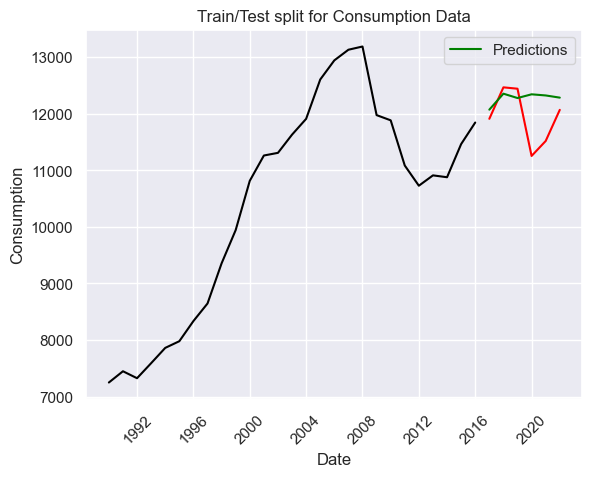

In [118]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Consumption')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Consumption Data")
#plt.show()
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [141]:
y_pred_df

,lower VALUE,upper VALUE,Predictions
Year,,,
2017-01-01,11463.591751,12681.480582,12072.536166
2018-01-01,11307.062277,13402.975140,12355.018708
2019-01-01,10678.699454,13877.719205,12278.209330
2020-01-01,10205.205783,14482.515950,12343.860866
2021-01-01,9781.243908,14866.322583,12323.783246
2022-01-01,9342.104108,15228.107696,12285.105902


In [144]:
test

,VALUE
Year,
2017-01-01,11911
2018-01-01,12467
2019-01-01,12443
2020-01-01,11254
2021-01-01,11519
2022-01-01,12069


In [147]:
arma_rmse = np.sqrt(mean_squared_error(test["VALUE"], y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  569.7900562980152


# Forecasting

In [130]:
# Convert the last year in the dataset to a timestamp
last_year_timestamp = pd.Timestamp(consumption.index[-1])

# Define the number of years to forecast
num_years_forecast = 2030 - last_year_timestamp.year

In [131]:
# Define and fit the SARIMA model with the entire dataset
model = SARIMAX(consumption, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Make future predictions
forecast = results.forecast(steps=num_years_forecast)

# Create index for the forecasted years
forecast_index = pd.date_range(start=last_year_timestamp, periods=num_years_forecast, freq='Y')

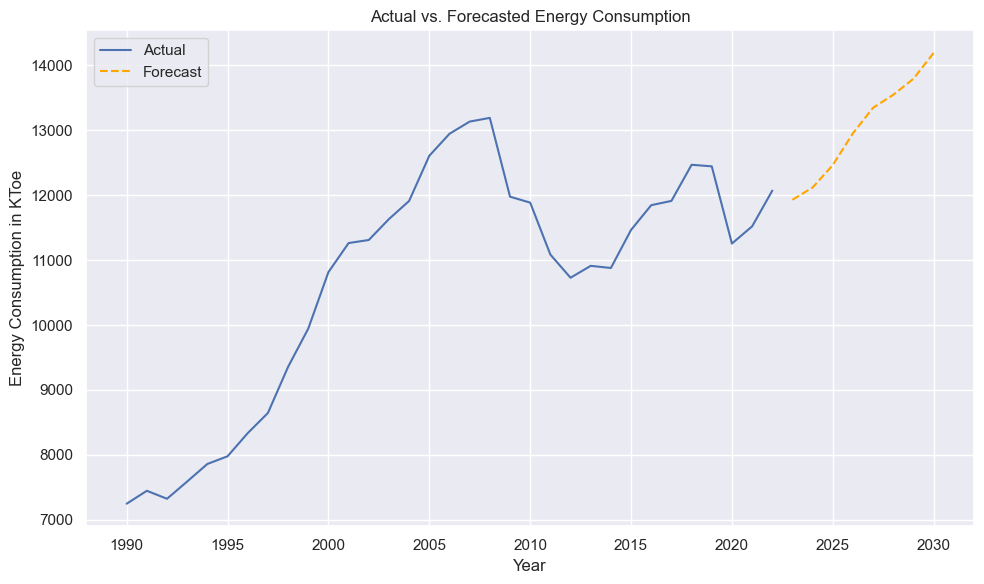

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(consumption.index, consumption, label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='orange')
plt.title('Actual vs. Forecasted Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Energy Consumption in KToe')
plt.legend()

plt.tight_layout()
plt.show()

# Production

In [242]:
df_production = pd.read_csv("DataMiningData.csv")
df_production['Date'] = (df_production['Month']).astype(str) + " " + (df_production['Year']).astype(str)
df_production['Date'] = pd.to_datetime(df_production['Date'])
production = df_production[['Date','Total Generation (Dependent Variable)']]
df_production.head()

,Month,Year,Total Generation (Dependent Variable),Hydro,Wind,Thermal Generation,Average Temp,Average Wind Speed (Knot),Sunshine Duration (hrs),Date
0,Jan,2010,2644,97,248,2166,2.4,7.0,86.6,2010-01-01
1,Feb,2010,2354,60,151,2044,3.3,6.5,85.0,2010-02-01
2,Mar,2010,2450,29,251,2109,6.4,7.9,156.1,2010-03-01
3,Apr,2010,2144,74,186,1851,9.8,7.8,230.8,2010-04-01
4,May,2010,2113,13,169,1829,11.7,7.6,196.9,2010-05-01


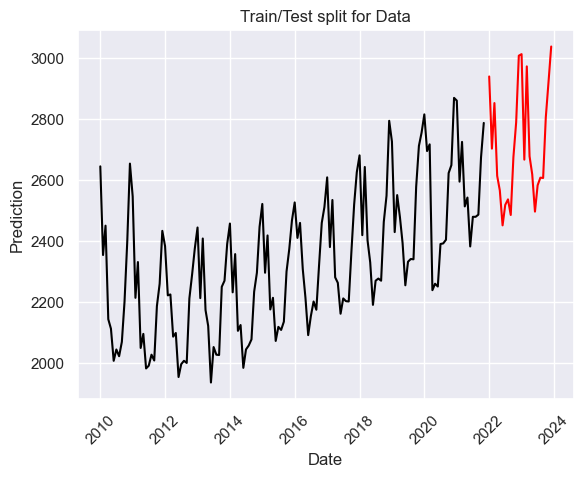

In [243]:
#Train Test Split
train = production[production.Date < pd.to_datetime("2021-12-01", format='%Y-%m-%d')]
test = production[production.Date > pd.to_datetime("2021-12-01", format='%Y-%m-%d')]
train =train.set_index('Date')
test = test.set_index('Date')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Data")
plt.show()

In [244]:
y = train['Total Generation (Dependent Variable)']
#Using SARIMAX for time series forecasting
ARMAmodel = SARIMAX(y, order = (5, 1, 0),seasonal_order=(1, 1, 1, 12))
#Fitting the Model
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

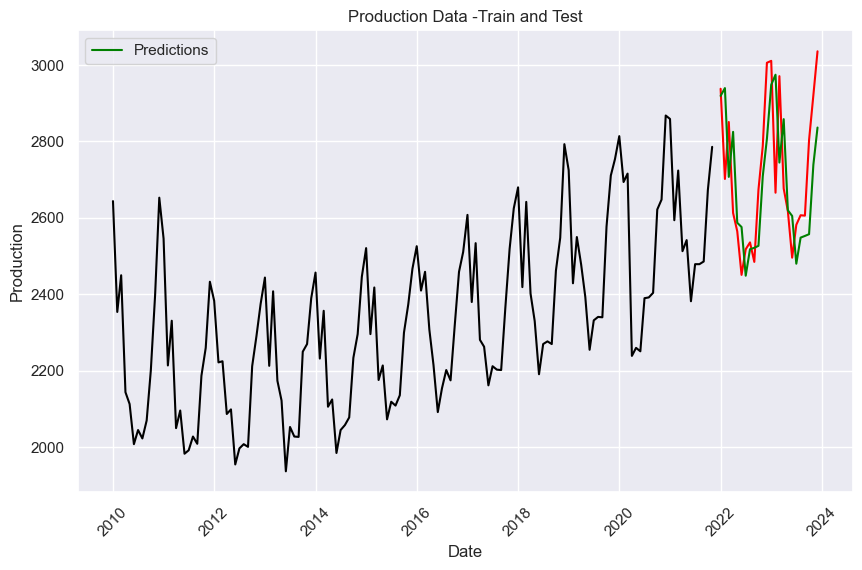

In [248]:
forecast_index = pd.date_range(start=last_year_timestamp, periods=num_years_forecast, freq='Y')
plt.figure(figsize=(10, 6))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Production')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Production Data -Train and Test")
#plt.show()
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [239]:
production

,Date,Total Generation (Dependent Variable)
0,2010-01-01,2644
1,2010-02-01,2354
2,2010-03-01,2450
3,2010-04-01,2144
4,2010-05-01,2113
...,...,...
163,2023-08-01,2607
164,2023-09-01,2606
165,2023-10-01,2804
166,2023-11-01,2921


In [240]:
production = production.set_index('Date')

In [253]:
arma_rmse = np.sqrt(mean_squared_error(test["Total Generation (Dependent Variable)"], y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  152.48173633637813
